# Football Match Prediction Model ---- using Spanish Super League Dataset

![](https://www.betawin.net/wp-content/uploads/2021/01/football-match-prediction-framework-objectives-1.jpg)

### Contents

* [Abstract](#abstract)
* [Dataset](#dataset)
* [Part A :: Exploratory Data Analysis](#eda)
   * [Importing Libraries](#importing-libraries)
   * [Dataset](#dataset)
   * [Information about the dataset](#information-dataset)
   * [Description of the dataset](#description-dataset)
   * [Analysis of various factors](#analysis-dataset)
       * [Most wins by a team](#most-win)
       * [Graphical Visualization](#graph)
* [Part B :: Prediction Models](#prediction-model)
   * [Spliting the dataset](#train-test-split)
   * [Logistic Regression](#logreg)
   * [Decision Tree Classification](#dtc)
   * [Random Forest Classifier](#rfc)
   * [K-Nearest Neighbour Algorithm](#classifier)
   * [Gausian NB Algorithm](#clf)
   * [Support Vector Machine](#svm)
* [Conclusion and Comparison of the algorithms](#comparison)

<a id="introduction"></a>
### Abstract

Sports Analysis and Betting have been on the rise lately with the ever increasing ease of Internet accessibility and popularity of Machine Learning. This is an interesting area of research for football, as football is regarded as much more complex and dynamic when compared to a few other sports. It is also the world's most popular sport, played in over 200 countries. Several methodologies and approaches are being taken to develop prediction systems. In this paper, we predict the match outcomes of the Spanish Super League, by performing a detailed study of past football matches and observing the most important attributes that are likely to decide the conclusion. We use algorithms such as Random forest classifer, Decision Tree classifier, KNN classifier, logistic regression, SDG classfier, Gausian NB and then select the best one to give us the target label. This model is applied on real team data and fixture results gathered from  https://www.kaggle.com/ricardomoya/football-matches-of-spanish-league for the past few seasons.

I am exploring this dataset for insights. It is very obvious that any team will be more likely to win in their homeland. Lets find if there is any solid proof for this statement from this dataset.

<a id = "dataset"></a>
### Dataset
The dataset is collected from Kaggle. Here is the link of the dataset : https://www.kaggle.com/ricardomoya/football-matches-of-spanish-league

<a id="eda"></a>
## Part A :: Exploratory Data Analysis of the Dataset

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

<a id="importing-libraries"></a>
### Importing the required libraries

In [1]:
# importing packages
import pandas as pd
import numpy as np
from scipy.interpolate import spline

# for plots
import matplotlib.pyplot as plt
from matplotlib.dates import date2num

# for date and time processing
import datetime

# for statistical graphs
import seaborn as sns

# for machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

<a id="dataset"></a>
### Getting the dataset from Kaggle

In [2]:
# getting the dataset 
train = pd.read_csv("../input/FMEL_Dataset.csv")

### Checking the dataset

In [3]:
# checking the dataset
print (train.head (10))

   id   season  division  round           localTeam         visitorTeam  \
0   1  1970-71         1      1       Athletic Club           Barcelona   
1   2  1970-71         1      1          Las Palmas  Atletico de Madrid   
2   3  1970-71         1      1         Real Madrid            Valencia   
3   4  1970-71         1      1       Celta de Vigo   Sporting de Gijon   
4   5  1970-71         1      1               Elche             Granada   
5   6  1970-71         1      1            Espanyol             Sevilla   
6   7  1970-71         1      1            Sabadell       Real Sociedad   
7   8  1970-71         1      1       Real Zaragoza           CD Malaga   
8   9  1970-71         1      2            Valencia          Las Palmas   
9  10  1970-71         1      2  Atletico de Madrid       Athletic Club   

   localGoals  visitorGoals        date  timestamp  
0           1             1  12/09/1970   21942000  
1           1             1  12/09/1970   21942000  
2           2  

In [4]:
# checking the dataset
print (train.tail (10))
# we have 36305 rows (starts with 0)

          id   season  division  round               localTeam  visitorTeam  \
36295  36296  2016-17         2     42                Alcorcon         Lugo   
36296  36297  2016-17         2     42           Real Zaragoza     Tenerife   
36297  36298  2016-17         2     42                   Elche  Real Oviedo   
36298  36299  2016-17         2     42                Mallorca       Getafe   
36299  36300  2016-17         2     42                 Cordoba       Girona   
36300  36301  2016-17         2     42              Valladolid        Cadiz   
36301  36302  2016-17         2     42                 Levante       Huesca   
36302  36303  2016-17         2     42                 Almeria         Reus   
36303  36304  2016-17         2     42  Gimnastic de Tarragona  UCAM Murcia   
36304  36305  2016-17         2     42                Numancia     Mirandes   

       localGoals  visitorGoals        date   timestamp  
36295           3             0  10/06/2017  1497045600  
36296         

<a id="information-dataset"></a>
### Information about the dataset

**Attributes given in the dataset**
1. id
2. season
3. division
4. round
5. local team or, home team
6. visitor team or, away team
7. home goals or, local goals
8. visitor goals
9. date
10. time stamp

In [5]:
# checking infos about data 
print (train.info())
# from the output of this line, we can learn that there is no null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36305 entries, 0 to 36304
Data columns (total 10 columns):
id              36305 non-null int64
season          36305 non-null object
division        36305 non-null int64
round           36305 non-null int64
localTeam       36305 non-null object
visitorTeam     36305 non-null object
localGoals      36305 non-null int64
visitorGoals    36305 non-null int64
date            36305 non-null object
timestamp       36305 non-null int64
dtypes: int64(6), object(4)
memory usage: 2.8+ MB
None


<a id="description-dataset"></a>
### Description about the dataset

In [6]:
# for statistical descriptions 
print (train.describe())

                 id      division         round    localGoals  visitorGoals  \
count  36305.000000  36305.000000  36305.000000  36305.000000   36305.00000   
mean   18153.000000      1.537557     19.845861      1.516706       0.93494   
std    10480.495098      0.498594     11.273393      1.263186       1.00889   
min        1.000000      1.000000      1.000000      0.000000       0.00000   
25%     9077.000000      1.000000     10.000000      1.000000       0.00000   
50%    18153.000000      2.000000     20.000000      1.000000       1.00000   
75%    27229.000000      2.000000     29.000000      2.000000       1.00000   
max    36305.000000      2.000000     44.000000     10.000000       8.00000   

          timestamp  
count  3.630500e+04  
mean   7.953677e+08  
std    4.235407e+08  
min    2.133720e+07  
25%    4.381308e+08  
50%    8.206236e+08  
75%    1.162073e+09  
max    1.497132e+09  


### Details of Non-numeric attributes

In [7]:
# for details of non-numeric attributes
print (train.describe(include=['O']))
# from the output of this line, we can learn that most number of matches were played in 2010-11 
# season, "Sporting de Gijon" is the team which played most number of the matches in both 
# local and outside, on 02/06/1991, most number of matches were played on a single day

         season          localTeam        visitorTeam        date
count     36305              36305              36305       36305
unique       47                114                114        4419
top     2009-10  Sporting de Gijon  Sporting de Gijon  10/06/2001
freq        842                894                894          20


<a id="analysis-dataset"></a>
### Analysis of the Dataset

In [8]:
# creating new feature "local_won"
# I am creating a new column called "local_won" based on "localGoals" and "visitorGoals" columns,
# which will tell us if the match is won by local team or not. If that particular match is won by 
# local team, 1 is shown if not 0.

def f(row):
    if row['localGoals'] > row['visitorGoals']:
        val = 1
    else:
        val = 0
    return val
train['local_won'] = train.apply(f, axis=1)


In [9]:
# check the "local_won" column added at the last
print (train.head ())

   id   season  division  round      localTeam         visitorTeam  \
0   1  1970-71         1      1  Athletic Club           Barcelona   
1   2  1970-71         1      1     Las Palmas  Atletico de Madrid   
2   3  1970-71         1      1    Real Madrid            Valencia   
3   4  1970-71         1      1  Celta de Vigo   Sporting de Gijon   
4   5  1970-71         1      1          Elche             Granada   

   localGoals  visitorGoals        date  timestamp  local_won  
0           1             1  12/09/1970   21942000          0  
1           1             1  12/09/1970   21942000          0  
2           2             0  12/09/1970   21942000          1  
3           2             0  13/09/1970   22028400          1  
4           1             1  13/09/1970   22028400          0  


In [10]:
# creating new feature "visitor_won"
# I am creating a new column called "visitor_won" based on "localGoals" and "visitorGoals" columns,
# which will tell us if the match is won by visitor team or not. If that particular match is won by 
# visitor team, 1 is shown if not 0.

def g(row):
    if row['visitorGoals'] > row['localGoals']:
        val = 1
    else:
        val = 0
    return val
train ["visitor_won"] = train.apply(g, axis=1)


In [11]:
# check the "visitor_won" column added at the last
print (train.head ())

   id   season  division  round      localTeam         visitorTeam  \
0   1  1970-71         1      1  Athletic Club           Barcelona   
1   2  1970-71         1      1     Las Palmas  Atletico de Madrid   
2   3  1970-71         1      1    Real Madrid            Valencia   
3   4  1970-71         1      1  Celta de Vigo   Sporting de Gijon   
4   5  1970-71         1      1          Elche             Granada   

   localGoals  visitorGoals        date  timestamp  local_won  visitor_won  
0           1             1  12/09/1970   21942000          0            0  
1           1             1  12/09/1970   21942000          0            0  
2           2             0  12/09/1970   21942000          1            0  
3           2             0  13/09/1970   22028400          1            0  
4           1             1  13/09/1970   22028400          0            0  


In [12]:
# creating new feature "match_draw"
# I am creating a new column called "match_draw" based on "localGoals" and "visitorGoals" columns,
# which will tell us if the match was tie or not. If that particular match was not won by anyone, 
# 1 is shown if not 0.

def h(row):
    if row['visitorGoals'] == row['localGoals']:
        val = 1
    else:
        val = 0
    return val
train ["match_draw"] = train.apply(h, axis=1)

In [13]:
# check the "match_draw" column added at the last
print (train.head ())

   id   season  division  round      localTeam         visitorTeam  \
0   1  1970-71         1      1  Athletic Club           Barcelona   
1   2  1970-71         1      1     Las Palmas  Atletico de Madrid   
2   3  1970-71         1      1    Real Madrid            Valencia   
3   4  1970-71         1      1  Celta de Vigo   Sporting de Gijon   
4   5  1970-71         1      1          Elche             Granada   

   localGoals  visitorGoals        date  timestamp  local_won  visitor_won  \
0           1             1  12/09/1970   21942000          0            0   
1           1             1  12/09/1970   21942000          0            0   
2           2             0  12/09/1970   21942000          1            0   
3           2             0  13/09/1970   22028400          1            0   
4           1             1  13/09/1970   22028400          0            0   

   match_draw  
0           1  
1           1  
2           0  
3           0  
4           1  


#### Creating the new features and adding it to the dataset

In [14]:
# creating new feature "total_goals"
# since it is the direct addition of two columns, we are not using IF statement
train['total_goals'] = train['visitorGoals'] + train['localGoals']

In [15]:
# check newly created "total_goals" column
train.head ()

,id,season,division,round,localTeam,visitorTeam,localGoals,visitorGoals,date,timestamp,local_won,visitor_won,match_draw,total_goals
0,1,1970-71,1,1,Athletic Club,Barcelona,1,1,12/09/1970,21942000,0,0,1,2
1,2,1970-71,1,1,Las Palmas,Atletico de Madrid,1,1,12/09/1970,21942000,0,0,1,2
2,3,1970-71,1,1,Real Madrid,Valencia,2,0,12/09/1970,21942000,1,0,0,2
3,4,1970-71,1,1,Celta de Vigo,Sporting de Gijon,2,0,13/09/1970,22028400,1,0,0,2
4,5,1970-71,1,1,Elche,Granada,1,1,13/09/1970,22028400,0,0,1,2


#### Checking the new features

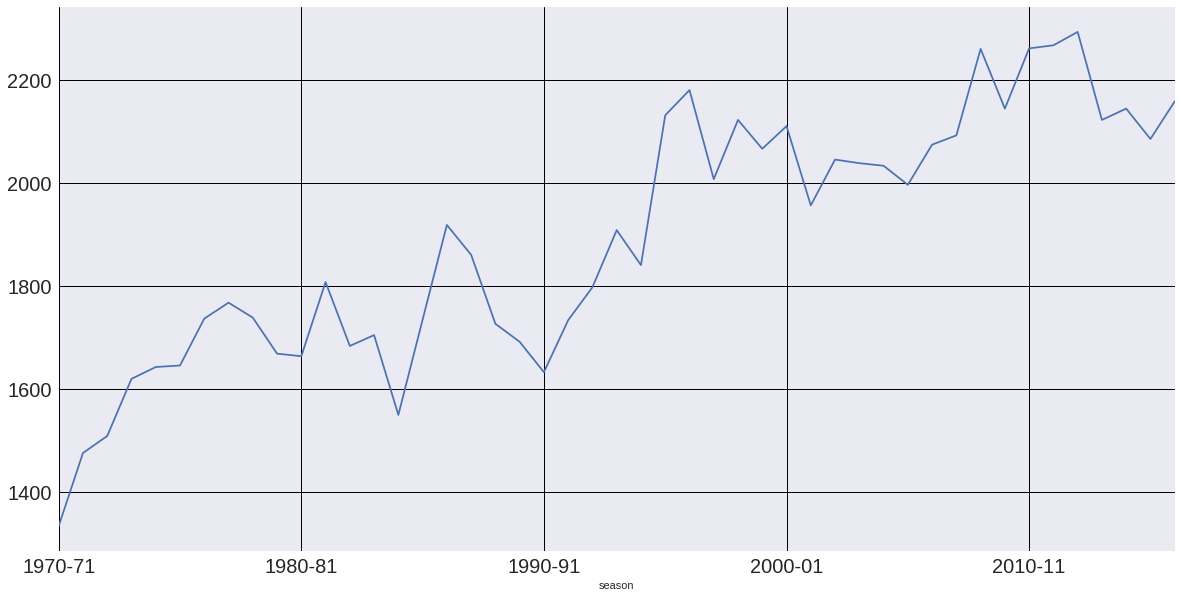

In [16]:
# checking how the total goals tread has been changed over seasons
fig = plt.figure(figsize=(20, 10))
batman = train.groupby('season')['total_goals'].sum()
batman.plot (kind="line", fontsize = 20)
plt.grid(b=True, which='both', color='Black',linestyle='-')
plt.show ()
# from the below chart, we can learn that total number of goals scored in every season have gone up 
# over the past 47 years

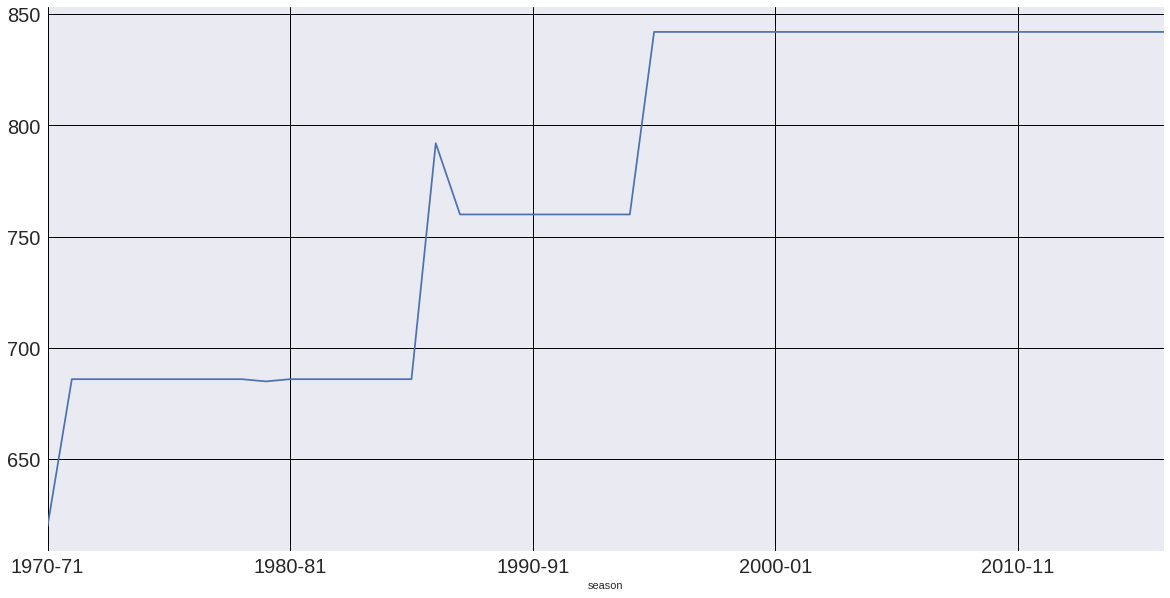

In [17]:
# lets check the trend of total matches played in these 47 years in each season
fig = plt.figure(figsize=(20, 10))
superman = train.groupby('season')['division'].count()
superman.plot (kind="line", fontsize = 20)
plt.grid(b=True, which='both', color='Black',linestyle='-')
plt.show ()
# from the below chart, we can confirm that total number of matches played in each season also
# went up. This is one of the main reason for increase in total number of goals 


<a id="most-win"></a>
### Checking : Which team won mostly?

In [18]:
# checking which team won mostly
# by analysing the output, we can confirm that local team is most likely to win the match
winning_percent = train[['season', 'local_won', 'visitor_won', 'match_draw']].groupby(['season'], 
     as_index=False).mean().sort_values(by='season')
print (winning_percent)

     season  local_won  visitor_won  match_draw
0   1970-71   0.596774     0.132258    0.270968
1   1971-72   0.594752     0.153061    0.252187
2   1972-73   0.577259     0.145773    0.276968
3   1973-74   0.648688     0.118076    0.233236
4   1974-75   0.629738     0.103499    0.266764
5   1975-76   0.637026     0.129738    0.233236
6   1976-77   0.604956     0.128280    0.266764
7   1977-78   0.628280     0.102041    0.269679
8   1978-79   0.623907     0.131195    0.244898
9   1979-80   0.589781     0.135766    0.274453
10  1980-81   0.562682     0.180758    0.256560
11  1981-82   0.577259     0.182216    0.240525
12  1982-83   0.545190     0.170554    0.284257
13  1983-84   0.534985     0.177843    0.287172
14  1984-85   0.510204     0.176385    0.313411
15  1985-86   0.558309     0.190962    0.250729
16  1986-87   0.568182     0.171717    0.260101
17  1987-88   0.513158     0.217105    0.269737
18  1988-89   0.461842     0.252632    0.285526
19  1989-90   0.502632     0.200000    0

### Analysis depending on the factor of Local won or, Home Match

In [19]:
# showing the average of local_won, visitor_won and match_draw
# this clearly shows that local team have won 51.1% of the overall matches played.
# 21.3% matches were won by visitor teams and 27.5% matches were went tie
print (winning_percent[['local_won', 'visitor_won', 'match_draw']].mean())

local_won      0.511558
visitor_won    0.213002
match_draw     0.275440
dtype: float64


<a id="graph"></a>
### Graphical Visualization

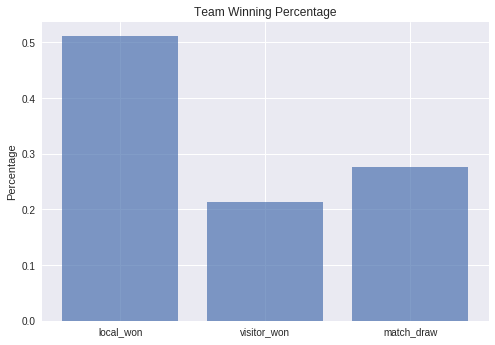

In [20]:
# chart to display teams that won most of the time
objects = ('local_won', 'visitor_won', 'match_draw')
y_pos = np.arange(len(objects))
performance = [0.511558,0.213002,0.275440]
 
plt.bar(y_pos, performance, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Team Winning Percentage')
plt.show ()

# its obvious from the below chart that teams that played in their own land are twice more
# likely to win the match

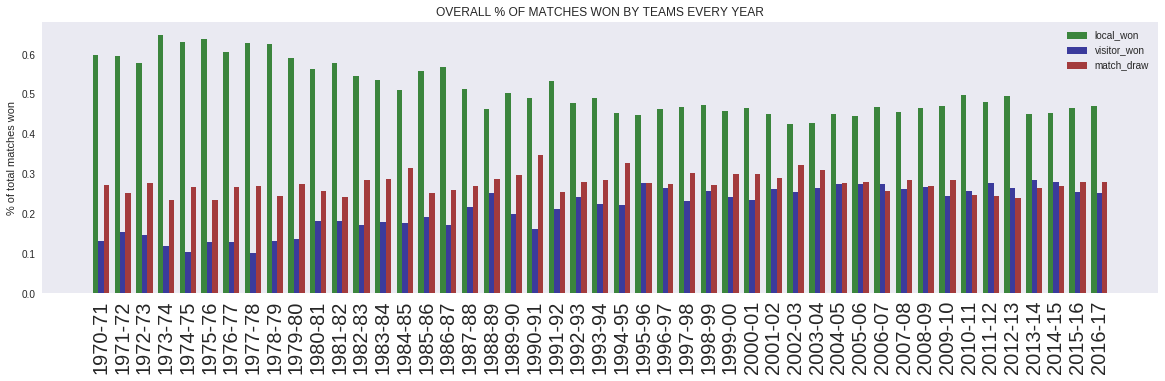

In [21]:
# plotting the bar graph to prove this
pos = list(range(len(winning_percent['local_won'])))
width = 0.25

fig, ax = plt.subplots(figsize=(20,5))

plt.bar(pos, winning_percent['local_won'], width, alpha=0.75, color='#006400')
plt.bar([p + width for p in pos], winning_percent['visitor_won'], width, alpha=0.75, color='#000080')
plt.bar([p + width*2 for p in pos], winning_percent['match_draw'], width, alpha=0.75, color='#8B0000')

ax.set_title('OVERALL % OF MATCHES WON BY TEAMS EVERY YEAR')
ax.set_ylabel('% of total matches won')

ax.set_xticks([p + 1 * width for p in pos])
ax.set_xticklabels(winning_percent['season'], rotation=90, fontsize = 20)

plt.legend(['local_won', 'visitor_won', 'match_draw'], loc='upper right')

plt.grid()
plt.show()

# from the below chart, its very obvious that when teams get to play in their own land, 
# tends to win the match than a team that goes to a foreign land for a match.

**Conclusion from the analysis**

It is being seen that over the 30 years of the Spanish Super League, the home team is always having the advantages over the away team or, the visitor team. The home team is having the advantage twice of that the away team is having. And also the advantage of the away team is approximately same as the game might be draw for both of the sides.

Hence, the local team is always having the advantages!

In [22]:
# lets check which team won most of the matches when played in home land
teams = train.groupby('localTeam')['local_won'].sum().sort_values(ascending=True)
print (teams)
# below are the teams won most of the times in their homeland:


localTeam
Mollerussa                     1
Alicante                       2
Burgos CF                      4
Moscardo                       5
Universidad de Las Palmas      5
Mallorca B                     6
Alcoyano                       6
UCAM Murcia                    7
Alzira                         7
Vecindario                     7
Reus                           7
Granada 74                     7
Real Union                     8
Aragon                         8
Ontinyent                      8
Ensidesa                       9
Lorca                          9
Orihuela                      10
AD Ceuta                      11
Ecija                         12
Aviles                        13
Mestalla                      15
Guadalajara                   16
Malaga B                      17
Langreo                       17
Lorca Deportiva               18
Llagostera                    20
Sevilla Atletico              20
Villarreal B                  26
FC Cartagena                  27


### Conclusion from the match winner analysis

**Most Successful Clubs**
1. Real Madrid
2. Barcelona
3. Atletico Madrid
4. Valencia
5. Sevilla

### Plotting the visualization and analysis

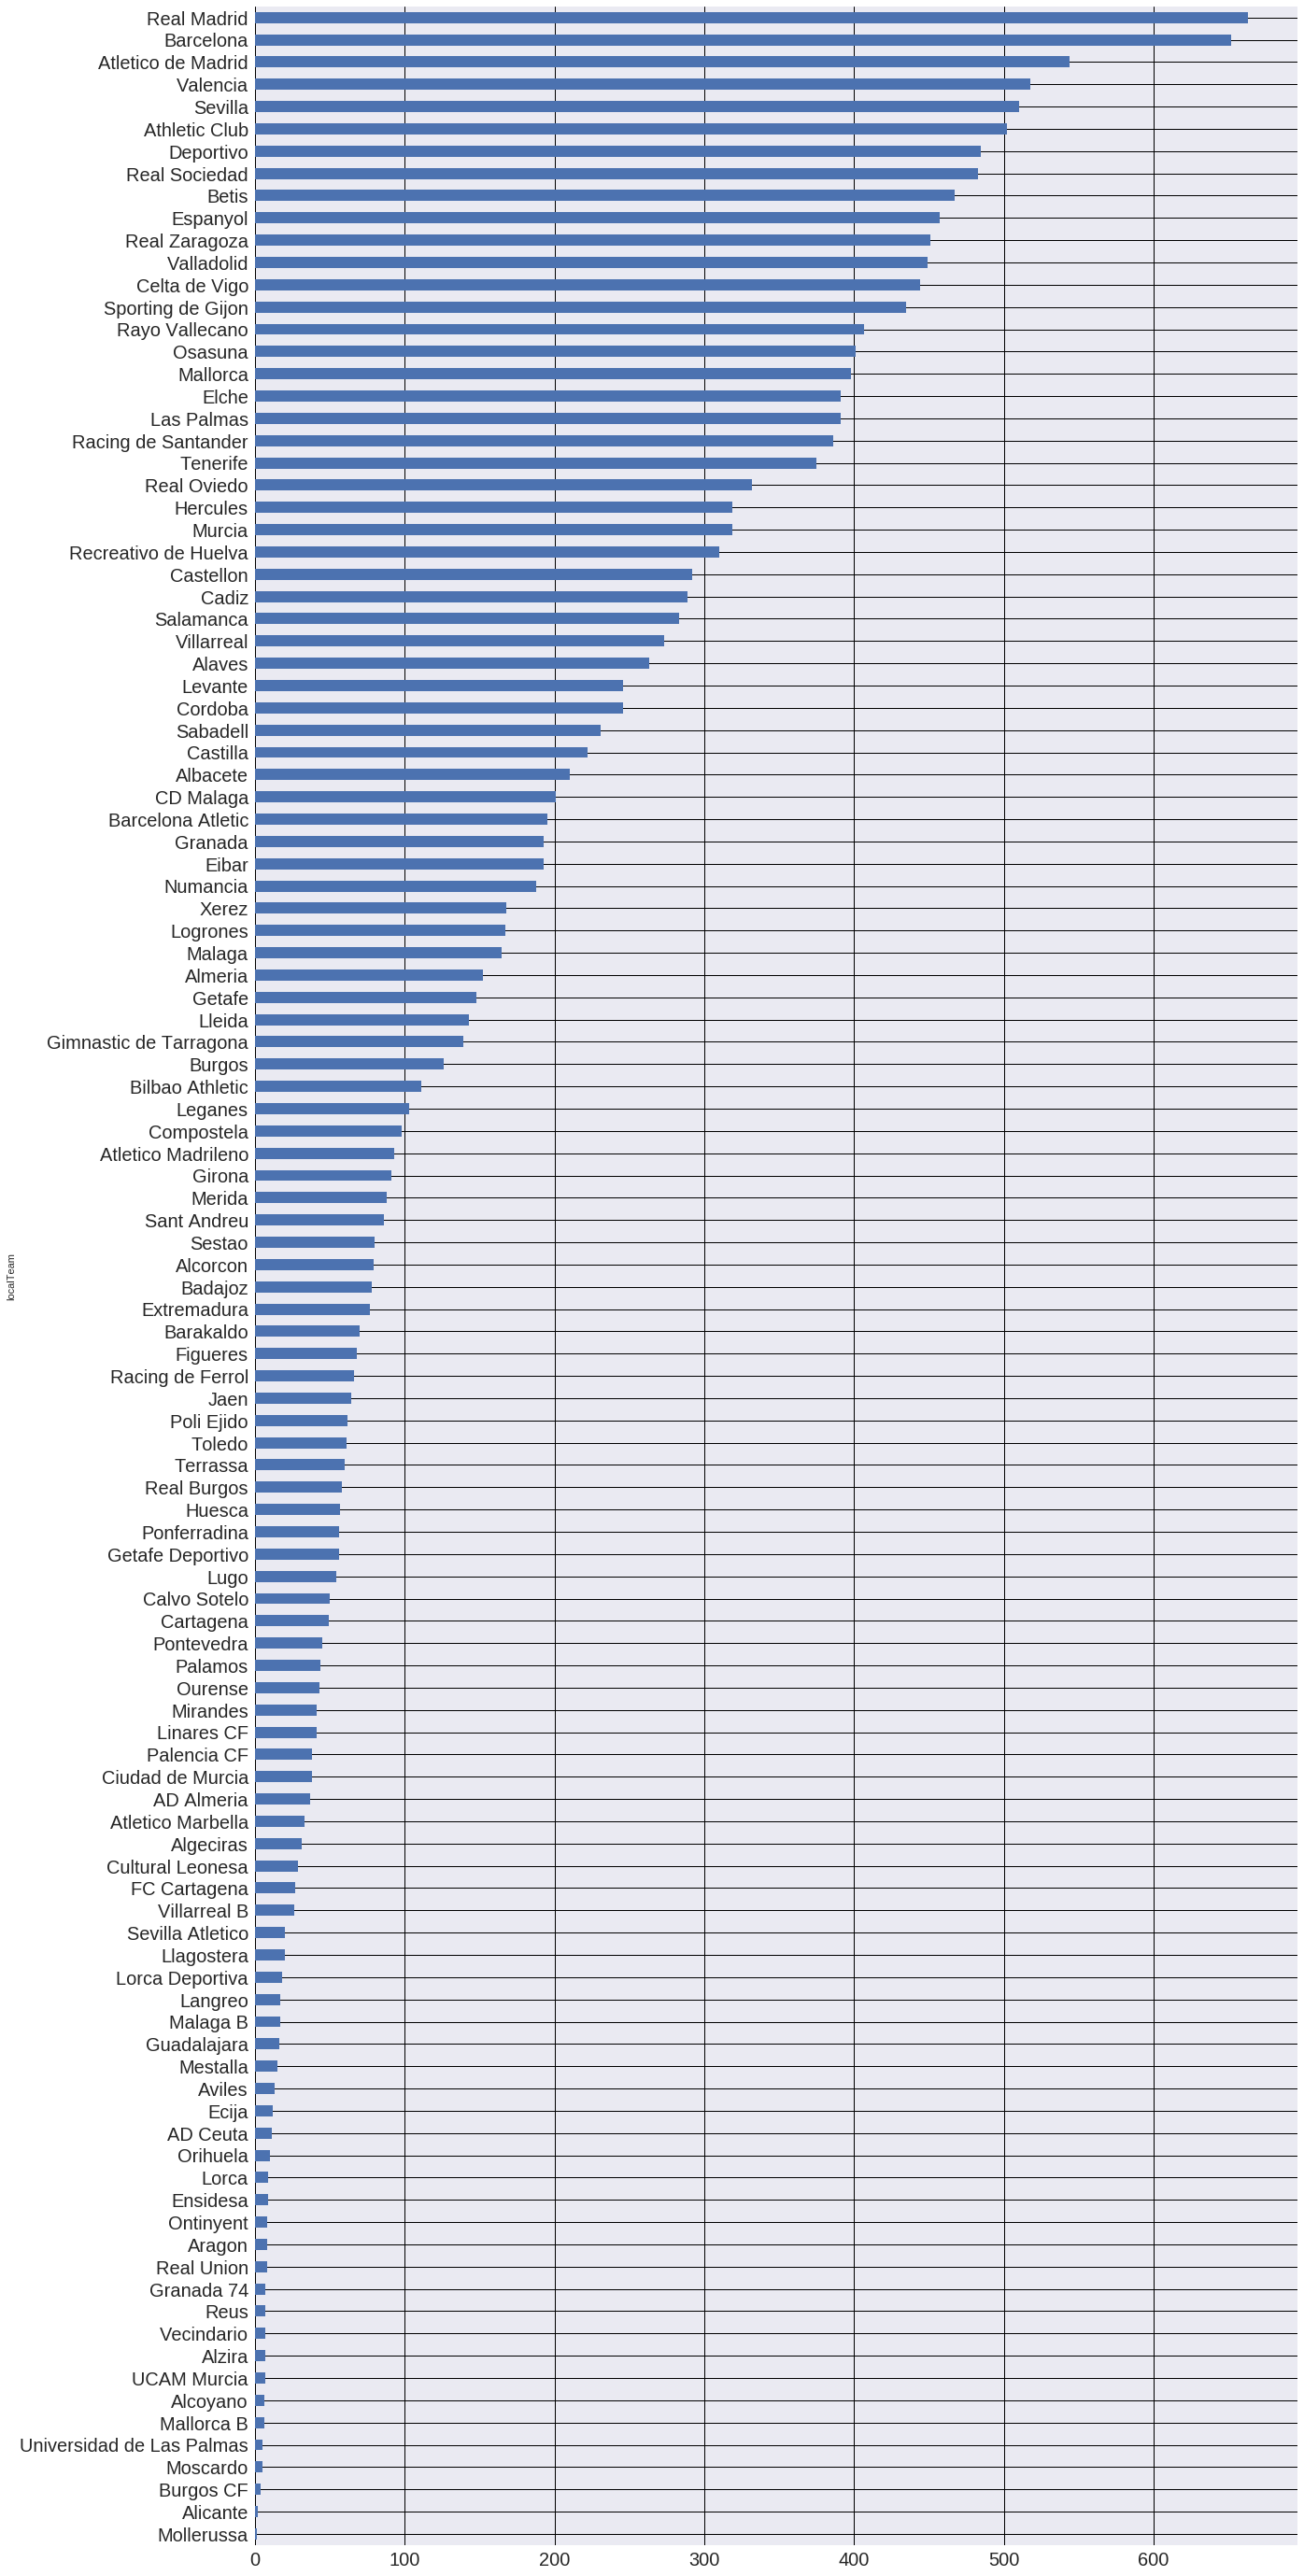

In [23]:
# lets plot this data in a horizontal chart
fig = plt.figure(figsize=(20,50))
teams = train.groupby('localTeam')['local_won'].sum().sort_values(ascending=True)
teams.plot(kind="barh", fontsize = 20)
plt.grid(b=True, which='both', color='Black',linestyle='-')
plt.show ()
# from the below chart, its clear that Real Madrid is the team that won most of the matches, followed 
# by Barcelona very closely

In [26]:
# I am going to analyze how many matches are totally played in every month
train['game_month'] = pd.to_datetime(train['date'], format='%d/%m/%Y')
train['game_date'] = train['game_month'].dt.month
train['game_weekday'] = train['game_month'].dt.weekday


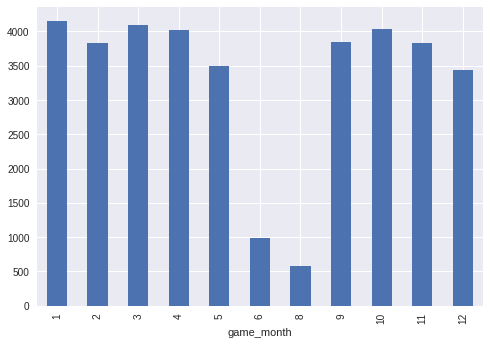

In [27]:
train.groupby([train['game_month'].dt.month])['round'].count().plot(kind='bar')

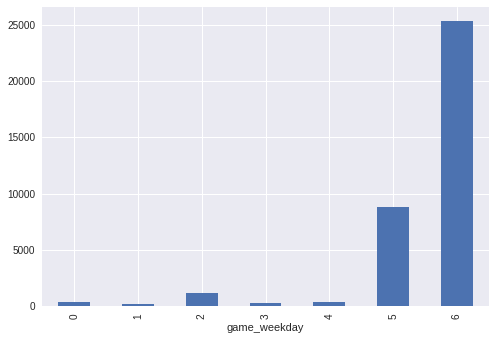

In [29]:
# Looks like most games are played on the weekend :)
train.groupby('game_weekday')['round'].count().plot(kind='bar')

**Most of the matches were played through the whole year, except the month of July and June. Because, the mid of the year is the time where the season is ending and the new season is starting!**

**Most of the matches were played in the weekends, so that the audience enjoy the football very much!**

*****************************************************************

<a id="prediction-model"></a>
## Part B :: Prediction Model Creation

In short, predictive modeling is a statistical technique using machine learning and data mining to predict and forecast likely future outcomes with the aid of historical and existing data. It works by analyzing current and historical data and projecting what it learns on a model generated to forecast likely outcomes.

Here we are going to predict the winner of any football match in the Spanish Super League, based on the provided dataset.
For predicting the winner of the matches, we are going to use several algorithms for fitting the model and then the models will be checked depending on the scores of the models.

**The following models that we are going to use -**
  * **Logistic Regression** : Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).
  
  
  * **Decision Tree Classifier** : Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
  
  
  * **Random Forest Classifier** : Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.
  
  
  * **Gausian NB** : This method is expected to be called several times consecutively on different chunks of a dataset so as to implement out-of-core or online learning. This is especially useful when the whole dataset is too big to fit in memory at once. This method has some performance and numerical stability overhead, hence it is better to call partial_fit on chunks of data that are as large as possible (as long as fitting in the memory budget) to hide the overhead.
  
  
  * **KNN algorithm** : K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories. K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.
  
  
  * **Support Vector Machine Algorithm** : Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.
 
 
We are going to use these six algorithms and based on the scores of the models the most fitted algorithm will be set! Now let's check out the algorithms.

**Importing the libraries for creating the prediction model**

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from time import time
from sklearn.metrics import f1_score
from os import path, makedirs, walk
from joblib import dump, load
import json

In [3]:
data = pd.read_csv('FMEL_Dataset.csv')

In [4]:
pd.DataFrame (data.corr().round(2))

,id,division,round,localGoals,visitorGoals,timestamp
id,1.00,0.02,0.08,-0.05,0.12,1.00
division,0.02,1.00,0.06,-0.06,-0.05,-0.00
round,0.08,0.06,1.00,0.01,0.02,0.09
localGoals,-0.05,-0.06,0.01,1.00,0.02,-0.05
visitorGoals,0.12,-0.05,0.02,0.02,1.00,0.13
timestamp,1.00,-0.00,0.09,-0.05,0.13,1.00


In [5]:
x = data['localGoals']

In [6]:
y = data['visitorGoals']

In [7]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)

<a id="train-test-split"></a>
**Training and Testing Dataset Spliting using the `train_test_split`**
  
  * Immporting the library from the sklearn.model_selection
  * Split the dataset into 80:20 ratio
  * x_train1 and y_train1 are the trainning datasets
  * x_test1 and y_test1 are the testing datasets
  * After the spliting of the datasets the model is ready to be prepared!

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x,y, test_size = 0.2)

<a id="logreg"></a>
### Logistic Regression 

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

In [10]:
logReg = LogisticRegression(max_iter = 5000)

In [11]:
logReg.fit(x_train1, y_train1)

D:\my project\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(max_iter=5000)

In [12]:
logReg.score(x_test1, y_test1)

0.4072678331090175

<a id="dtc"></a>
### Decision Tree Classifier Algorithm

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [13]:
dtc = DecisionTreeClassifier()

In [14]:
dtc.fit(x_train1, y_train1)

DecisionTreeClassifier()

In [15]:
dtc.score(x_test1, y_test1)

0.40511440107671604

**Decision Tree Classifier Algorithm using the criterion = entropy parameter**

In [16]:
dtce = DecisionTreeClassifier(criterion = 'entropy')

In [17]:
dtce.fit(x_train1, y_train1)

DecisionTreeClassifier(criterion='entropy')

In [18]:
dtce.score(x_test1, y_test1)

0.40511440107671604

<a id="rfc"></a>
### Random Forest Classifier Algorithm

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [19]:
rfc = RandomForestClassifier()


In [20]:
rfc.fit(x_train1, y_train1)

D:\my project\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier()

In [21]:
rfc.score(x_test1, y_test1)

0.40511440107671604

<a id="knn"></a>
### K-Nearest Neighbours Algorithm

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories. K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

In [22]:
from sklearn.neighbors import KNeighborsClassifier  

In [23]:
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 ) 

In [24]:
classifier.fit(x_train1, y_train1)  

D:\my project\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [25]:
classifier.score(x_test1, y_test1)

0.39596231493943473

<a id="clf"></a>
### Gausian NB Algorithm

This method is expected to be called several times consecutively on different chunks of a dataset so as to implement out-of-core or online learning. This is especially useful when the whole dataset is too big to fit in memory at once. This method has some performance and numerical stability overhead, hence it is better to call partial_fit on chunks of data that are as large as possible (as long as fitting in the memory budget) to hide the overhead.

In [26]:
clf = GaussianNB()

In [27]:
clf.fit(x_train1, y_train1) 

D:\my project\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [28]:
clf.score(x_test1, y_test1)

0.40659488559892326

<a id="svm"></a>
### Support Vector Machine Algorithm

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

In [29]:
svm = SVC()

In [30]:
svm.fit(x_train1, y_train1)

D:\my project\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [31]:
svm.score(x_test1, y_test1)

0.40511440107671604

<a id="comparison"></a>
### Comparative analysis among the algorithms for this project

We have deployed six machine learning algorithms and every algorithm is deployed successfully without any hesitation. We have checked the accuracy of the models based on the accuracy score of each of the models. Now let's take a look at the scores of each models.

|Name of the Model|Accuracy Score|
|:---:|:---:|
|Logistic Regression|0.4072678331090175|
|Decision Tree Classifier|0.40511440107671604|
|Random Forest Classifier|0.40511440107671604|
|Gausian NB Algorithm|0.40659488559892326|
|KNN Algorithm|0.39596231493943473|
|Support Vector Machine Algorithm|0.40511440107671604|

**Comparing all those scores scored by the machine learning algorithms, it is clear that Logistic Regression is having the upper hand in case of this dataset and after this, we can use Gausian NB algorithm, which is also having good score as compared to the other deployed algorithms**

Best Fitted Models ranking - 
1. Logistic Regression
2. Gausian NB Algorithm
3. Decision Tree Classifier
4. Random Forest Classifier
5. Support Vector Machine
6. KNN Algorithm

Hooray!! The models are deployed successfully!

## Hope this project will help you! Thank you!